In [1]:
import pandas as pd
import numpy as np
import math
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib
import time
import os

# Prepare Data

In [2]:
df = pd.read_csv("data/raw_data_phawit_revised_init.csv")
df

,raw_g_aflow,raw_g_dflow,raw_g_mflow,raw_s_aflow,raw_s_dflow,raw_s_mflow,raw_p_aflow,raw_g_depth,raw_hp,raw_g_antu,...,distrib_press,distrib_lost,floor_area,pump_eng_hp,calc_flow,calc_NTU_avg,calc_NTU_peak,calc_elev_change,calc_hp,total_energy_use_kBtu
0,0,0,0,2,3,3,0,0,75,0.0,...,61,9,8500,0,2,10,64,140,395,15990815
1,4,4,12,0,0,0,0,260,1430,1.0,...,100,21,0,0,4,1,3,266,2105,52678647
2,0,0,0,5,8,14,0,0,1200,0.0,...,60,15,17666,0,5,35,657,125,1300,13928280
3,0,0,0,3,3,5,0,0,400,0.0,...,60,18,18414,0,3,4,11,45,420,25681304
4,58,90,173,0,0,0,0,0,10550,0.0,...,100,9,200000,0,58,0,0,460,18550,373803600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0,0,1,1,2,4,0,0,0,0.0,...,75,0,25619,0,2,2,3,0,0,8851295
180,3,7,10,0,0,0,0,0,0,0.0,...,0,6,0,0,3,2,2000,0,0,37424760
181,0,0,0,0,0,0,0,0,0,0.0,...,60,0,0,0,0,0,0,0,0,415018
182,0,0,0,0,0,0,0,0,0,0.0,...,75,35,1000,0,0,0,0,0,0,1504816


In [3]:
df.columns

Index(['raw_g_aflow', 'raw_g_dflow', 'raw_g_mflow', 'raw_s_aflow',
       'raw_s_dflow', 'raw_s_mflow', 'raw_p_aflow', 'raw_g_depth', 'raw_hp',
       'raw_g_antu', 'raw_g_pntu', 'raw_s_antu', 'raw_s_pntu', 'res_weight',
       'distrib_pop', 'distrib_area', 'distrib_main', 'distrib_high',
       'distrib_low', 'distrib_hp', 'distrib_storage', 'distrib_press',
       'distrib_lost', 'floor_area', 'pump_eng_hp', 'calc_flow',
       'calc_NTU_avg', 'calc_NTU_peak', 'calc_elev_change', 'calc_hp',
       'total_energy_use_kBtu'],
      dtype='object')

In [4]:
selected_columns_15_and_y = ['raw_g_dflow','raw_g_mflow','raw_g_depth','raw_g_pntu','res_weight','distrib_area','distrib_main','distrib_storage','distrib_press','distrib_lost','calc_flow','calc_NTU_avg','calc_NTU_peak','calc_elev_change','calc_hp','total_energy_use_kBtu']
selected_columns_15_and_y

['raw_g_dflow',
 'raw_g_mflow',
 'raw_g_depth',
 'raw_g_pntu',
 'res_weight',
 'distrib_area',
 'distrib_main',
 'distrib_storage',
 'distrib_press',
 'distrib_lost',
 'calc_flow',
 'calc_NTU_avg',
 'calc_NTU_peak',
 'calc_elev_change',
 'calc_hp',
 'total_energy_use_kBtu']

In [5]:
df = df[selected_columns_15_and_y]
df

,raw_g_dflow,raw_g_mflow,raw_g_depth,raw_g_pntu,res_weight,distrib_area,distrib_main,distrib_storage,distrib_press,distrib_lost,calc_flow,calc_NTU_avg,calc_NTU_peak,calc_elev_change,calc_hp,total_energy_use_kBtu
0,0,0,0,0.0,0,7,101,2375,61,9,2,10,64,140,395,15990815
1,4,12,260,3.0,0,80,210,15,100,21,4,1,3,266,2105,52678647
2,0,0,0,0.0,8,27,216,7,60,15,5,35,657,125,1300,13928280
3,0,0,0,0.0,350,17,200,6,60,18,3,4,11,45,420,25681304
4,90,173,0,0.0,2000,360,2200,65,100,9,58,0,0,460,18550,373803600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0,1,0,0.0,100,4,72,4,75,0,2,2,3,0,0,8851295
180,7,10,0,0.0,0,22,125,1,0,6,3,2,2000,0,0,37424760
181,0,0,0,0.0,0,9,431,0,60,0,0,0,0,0,0,415018
182,0,0,0,0.0,0,0,10,1,75,35,0,0,0,0,0,1504816


In [6]:
# List of columns to take the logarithm of
columns_to_log = ['raw_g_dflow', 'raw_g_mflow','res_weight','distrib_area','distrib_main','distrib_storage','calc_flow','calc_NTU_peak','calc_hp','total_energy_use_kBtu']  # Replace with actual column names
len(columns_to_log)


10

In [7]:
# Define epsilon using the math module
epsilon = math.ulp(1.0)

# Replace 0 with epsilon in the selected columns
df[columns_to_log] = df[columns_to_log].replace(0, epsilon)
df

/var/folders/xr/f6sgrqmd7cv2l742vt5ngyhr0000gn/T/ipykernel_6902/3607909694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_log] = df[columns_to_log].replace(0, epsilon)


,raw_g_dflow,raw_g_mflow,raw_g_depth,raw_g_pntu,res_weight,distrib_area,distrib_main,distrib_storage,distrib_press,distrib_lost,calc_flow,calc_NTU_avg,calc_NTU_peak,calc_elev_change,calc_hp,total_energy_use_kBtu
0,2.220446e-16,2.220446e-16,0,0.0,2.220446e-16,7.000000e+00,101.0,2.375000e+03,61,9,2.000000e+00,10,6.400000e+01,140,3.950000e+02,15990815
1,4.000000e+00,1.200000e+01,260,3.0,2.220446e-16,8.000000e+01,210.0,1.500000e+01,100,21,4.000000e+00,1,3.000000e+00,266,2.105000e+03,52678647
2,2.220446e-16,2.220446e-16,0,0.0,8.000000e+00,2.700000e+01,216.0,7.000000e+00,60,15,5.000000e+00,35,6.570000e+02,125,1.300000e+03,13928280
3,2.220446e-16,2.220446e-16,0,0.0,3.500000e+02,1.700000e+01,200.0,6.000000e+00,60,18,3.000000e+00,4,1.100000e+01,45,4.200000e+02,25681304
4,9.000000e+01,1.730000e+02,0,0.0,2.000000e+03,3.600000e+02,2200.0,6.500000e+01,100,9,5.800000e+01,0,2.220446e-16,460,1.855000e+04,373803600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2.220446e-16,1.000000e+00,0,0.0,1.000000e+02,4.000000e+00,72.0,4.000000e+00,75,0,2.000000e+00,2,3.000000e+00,0,2.220446e-16,8851295
180,7.000000e+00,1.000000e+01,0,0.0,2.220446e-16,2.200000e+01,125.0,1.000000e+00,0,6,3.000000e+00,2,2.000000e+03,0,2.220446e-16,37424760
181,2.220446e-16,2.220446e-16,0,0.0,2.220446e-16,9.000000e+00,431.0,2.220446e-16,60,0,2.220446e-16,0,2.220446e-16,0,2.220446e-16,415018
182,2.220446e-16,2.220446e-16,0,0.0,2.220446e-16,2.220446e-16,10.0,1.000000e+00,75,35,2.220446e-16,0,2.220446e-16,0,2.220446e-16,1504816


In [8]:
# Take the natural logarithm and create new columns
for column in columns_to_log:
    new_column_name = f'ln_{column}'
    df[new_column_name] = np.log(df[column])
df

/var/folders/xr/f6sgrqmd7cv2l742vt5ngyhr0000gn/T/ipykernel_6902/75100450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name] = np.log(df[column])
/var/folders/xr/f6sgrqmd7cv2l742vt5ngyhr0000gn/T/ipykernel_6902/75100450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name] = np.log(df[column])
/var/folders/xr/f6sgrqmd7cv2l742vt5ngyhr0000gn/T/ipykernel_6902/75100450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,raw_g_dflow,raw_g_mflow,raw_g_depth,raw_g_pntu,res_weight,distrib_area,distrib_main,distrib_storage,distrib_press,distrib_lost,...,ln_raw_g_dflow,ln_raw_g_mflow,ln_res_weight,ln_distrib_area,ln_distrib_main,ln_distrib_storage,ln_calc_flow,ln_calc_NTU_peak,ln_calc_hp,ln_total_energy_use_kBtu
0,2.220446e-16,2.220446e-16,0,0.0,2.220446e-16,7.000000e+00,101.0,2.375000e+03,61,9,...,-36.043653,-36.043653,-36.043653,1.945910,4.615121,7.772753,0.693147,4.158883,5.978886,16.587525
1,4.000000e+00,1.200000e+01,260,3.0,2.220446e-16,8.000000e+01,210.0,1.500000e+01,100,21,...,1.386294,2.484907,-36.043653,4.382027,5.347108,2.708050,1.386294,1.098612,7.652071,17.779721
2,2.220446e-16,2.220446e-16,0,0.0,8.000000e+00,2.700000e+01,216.0,7.000000e+00,60,15,...,-36.043653,-36.043653,2.079442,3.295837,5.375278,1.945910,1.609438,6.487684,7.170120,16.449432
3,2.220446e-16,2.220446e-16,0,0.0,3.500000e+02,1.700000e+01,200.0,6.000000e+00,60,18,...,-36.043653,-36.043653,5.857933,2.833213,5.298317,1.791759,1.098612,2.397895,6.040255,17.061274
4,9.000000e+01,1.730000e+02,0,0.0,2.000000e+03,3.600000e+02,2200.0,6.500000e+01,100,9,...,4.499810,5.153292,7.600902,5.886104,7.696213,4.174387,4.060443,-36.043653,9.828225,19.739241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2.220446e-16,1.000000e+00,0,0.0,1.000000e+02,4.000000e+00,72.0,4.000000e+00,75,0,...,-36.043653,0.000000,4.605170,1.386294,4.276666,1.386294,0.693147,1.098612,-36.043653,15.996074
180,7.000000e+00,1.000000e+01,0,0.0,2.220446e-16,2.200000e+01,125.0,1.000000e+00,0,6,...,1.945910,2.302585,-36.043653,3.091042,4.828314,0.000000,1.098612,7.600902,-36.043653,17.437843
181,2.220446e-16,2.220446e-16,0,0.0,2.220446e-16,9.000000e+00,431.0,2.220446e-16,60,0,...,-36.043653,-36.043653,-36.043653,2.197225,6.066108,-36.043653,-36.043653,-36.043653,-36.043653,12.936077
182,2.220446e-16,2.220446e-16,0,0.0,2.220446e-16,2.220446e-16,10.0,1.000000e+00,75,35,...,-36.043653,-36.043653,-36.043653,-36.043653,2.302585,0.000000,-36.043653,-36.043653,-36.043653,14.224181


In [9]:
X = df.drop(columns=['total_energy_use_kBtu','ln_total_energy_use_kBtu'])  # All columns except the target
y = df['ln_total_energy_use_kBtu']
X.shape

(184, 24)

In [10]:
y.shape

(184,)

# Train 1 model

In [11]:
# 2. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# 3. Create and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# 4. Make Predictions
y_pred = model.predict(X_test)

In [14]:
# 5. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate BIC and AIC
n = len(y_test)  # Number of observations
k = X.shape[1]   # Number of predictors (features)

# BIC and AIC
bic = n * np.log(mse) + k * np.log(n)
aic = n * np.log(mse) + 2 * k

# Print evaluation metrics
print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R-squared: {r2}, BIC: {bic}, AIC: {aic}')

MSE: 3.7040425189197523, RMSE: 1.924588922060956, MAE: 1.4224966426527563, R-squared: 0.39473113318288244, BIC: 135.11074735205906, AIC: 96.44871744859768


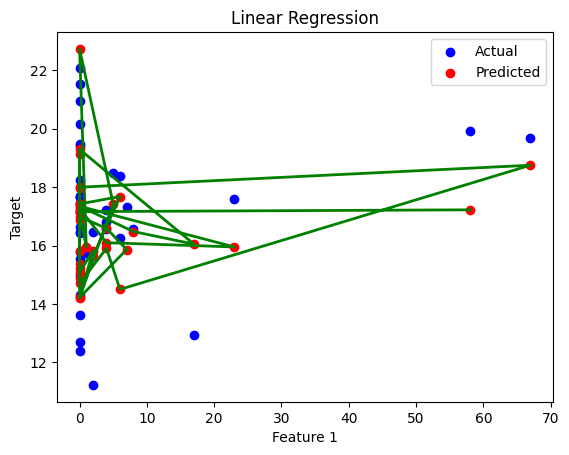

In [15]:
# 6. Visualize the Results
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')  # Use the first feature for x-axis
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted')  # Use the same feature for predictions
plt.plot(X_test.iloc[:, 0], y_pred, color='green', linewidth=2)
plt.xlabel('Feature 1')  # Adjust this label based on your actual feature name
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()


# Train all Possible Regression

In [16]:
def train_regression_with_columns(selected_columns,X,y,random_state):
    # 1. Select columns
    X = X[selected_columns]
    
    # 2. Split the Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # 3. Create and Train the Model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # 4. Make Predictions
    y_pred = model.predict(X_test)
    
    # 5. Evaluate the Model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    # Calculate BIC and AIC
    n = len(y_test)  # Number of observations
    k = X.shape[1]   # Number of predictors (features)

    # BIC and AIC
    bic = n * np.log(mse) + k * np.log(n)
    aic = n * np.log(mse) + 2 * k

    # Print evaluation metrics
    print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R-squared: {r2}, BIC: {bic}, AIC: {aic}')
    
    result = {
        'mse' : mse,
        'rmse' : rmse,
        'mae' : mae,
        'r2' : r2,
        'bic' : bic,
        'aic' : aic,    
    }
    
    return result

selected_columns = ['raw_g_dflow','raw_g_mflow']
random_state = 42
train_regression_with_columns(selected_columns,X,y,random_state)

MSE: 6.1252327782327285, RMSE: 2.4749207620109233, MAE: 1.8276295992194285, R-squared: -0.0009098663784288252, BIC: 74.28125595705663, AIC: 71.05942013176818


{'mse': 6.1252327782327285,
 'rmse': 2.4749207620109233,
 'mae': 1.8276295992194285,
 'r2': -0.0009098663784288252,
 'bic': 74.28125595705663,
 'aic': 71.05942013176818}

## Loop training

In [17]:
X.shape

(184, 24)

In [18]:
y.shape

(184,)

In [19]:
list(X.columns)

['raw_g_dflow',
 'raw_g_mflow',
 'raw_g_depth',
 'raw_g_pntu',
 'res_weight',
 'distrib_area',
 'distrib_main',
 'distrib_storage',
 'distrib_press',
 'distrib_lost',
 'calc_flow',
 'calc_NTU_avg',
 'calc_NTU_peak',
 'calc_elev_change',
 'calc_hp',
 'ln_raw_g_dflow',
 'ln_raw_g_mflow',
 'ln_res_weight',
 'ln_distrib_area',
 'ln_distrib_main',
 'ln_distrib_storage',
 'ln_calc_flow',
 'ln_calc_NTU_peak',
 'ln_calc_hp']

In [25]:
def group_by_length(lst):
    result = {}
    for length in range(1, len(lst) + 1):
        combinations = list(itertools.combinations(lst, length))
        result[length] = combinations
    return result

random_state = 42

selected_column = list(X.columns)[:5]
grouped = group_by_length(selected_column)
i = 0
for length, groups in grouped.items():
    print(f"\nLength {length}",'='*100)
    G = [list(x) for x in groups]
#     print('groups',groups)
    for ii,g in enumerate(G):
        t = time.time()
        print(f"\nround={i} n_columns={length}::[{ii+1}/{len(G)}]::{g}")
        results = train_regression_with_columns(selected_columns,X,y,random_state)
        results['n_columns'] = length
        results['random_state'] = random_state
        results['time'] = time.time() - t
        results['features'] = g
        results['round'] = i
        results['no'] = ii
        print('results:',results)
        print('\n','-'*100)
        
        # Save results to CSV
        results_df = pd.DataFrame([results])
        file_path = f'results_all_possible_regression/all_possible_regression24_{length}_features.csv'
        if os.path.exists(file_path):
            results_df.to_csv(file_path, mode='a', header=False, index=False)
        else:
            results_df.to_csv(file_path, mode='w', header=True, index=False)
    
    
        i += 1
        
        


Length 1 ====================================================================================================

round=0 n_columns=1::[1/5]::['raw_g_dflow']
MSE: 6.1252327782327285, RMSE: 2.4749207620109233, MAE: 1.8276295992194285, R-squared: -0.0009098663784288252, BIC: 74.28125595705663, AIC: 71.05942013176818
results: {'mse': 6.1252327782327285, 'rmse': 2.4749207620109233, 'mae': 1.8276295992194285, 'r2': -0.0009098663784288252, 'bic': 74.28125595705663, 'aic': 71.05942013176818, 'n_columns': 1, 'random_state': 42, 'time': 0.007649898529052734, 'features': ['raw_g_dflow'], 'round': 0, 'no': 0}

 ----------------------------------------------------------------------------------------------------

round=1 n_columns=1::[2/5]::['raw_g_mflow']
MSE: 6.1252327782327285, RMSE: 2.4749207620109233, MAE: 1.8276295992194285, R-squared: -0.0009098663784288252, BIC: 74.28125595705663, AIC: 71.05942013176818
results: {'mse': 6.1252327782327285, 'rmse': 2.4749207620109233, 'mae': 1.8276295992194285


round=26 n_columns=4::[2/5]::['raw_g_dflow', 'raw_g_mflow', 'raw_g_depth', 'res_weight']
MSE: 6.1252327782327285, RMSE: 2.4749207620109233, MAE: 1.8276295992194285, R-squared: -0.0009098663784288252, BIC: 74.28125595705663, AIC: 71.05942013176818
results: {'mse': 6.1252327782327285, 'rmse': 2.4749207620109233, 'mae': 1.8276295992194285, 'r2': -0.0009098663784288252, 'bic': 74.28125595705663, 'aic': 71.05942013176818, 'n_columns': 4, 'random_state': 42, 'time': 0.0045969486236572266, 'features': ['raw_g_dflow', 'raw_g_mflow', 'raw_g_depth', 'res_weight'], 'round': 26, 'no': 1}

 ----------------------------------------------------------------------------------------------------

round=27 n_columns=4::[3/5]::['raw_g_dflow', 'raw_g_mflow', 'raw_g_pntu', 'res_weight']
MSE: 6.1252327782327285, RMSE: 2.4749207620109233, MAE: 1.8276295992194285, R-squared: -0.0009098663784288252, BIC: 74.28125595705663, AIC: 71.05942013176818
results: {'mse': 6.1252327782327285, 'rmse': 2.4749207620109233, '

In [203]:
selected_columns = ['raw_g_dflow','raw_g_mflow']
X = X[selected_columns]

In [107]:
# 2. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((147, 2), (37, 2), (147,), (37,))

In [109]:
# 3. Create and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [110]:
# 5. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate BIC and AIC
n = len(y_test)  # Number of observations
k = X.shape[1]   # Number of predictors (features)

# BIC and AIC
bic = n * np.log(mse) + k * np.log(n)
aic = n * np.log(mse) + 2 * k

# Print evaluation metrics
print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R-squared: {r2}, BIC: {bic}, AIC: {aic}')

MSE: 3.7040425189197523, RMSE: 1.924588922060956, MAE: 1.4224966426527563, R-squared: 0.39473113318288244, BIC: 55.67055327388613, AIC: 52.44871744859768


In [64]:
def group_by_length(lst):
    result = {}
    for length in range(1, len(lst) + 1):
        combinations = list(itertools.combinations(lst, length))
        result[length] = combinations
    return result

# Example usage
my_list = [1, 2, 3,4,5,6]
grouped = group_by_length(my_list)
for length, groups in grouped.items():
#     print(f"Length {length}: {[list(x) for x in groups]}")
    print(f"\nLength {length}",'-'*100)
    for g in [list(x) for x in groups]:
        print(g)
    



Length 1 ----------------------------------------------------------------------------------------------------
[1]
[2]
[3]
[4]
[5]
[6]

Length 2 ----------------------------------------------------------------------------------------------------
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[3, 4]
[3, 5]
[3, 6]
[4, 5]
[4, 6]
[5, 6]

Length 3 ----------------------------------------------------------------------------------------------------
[1, 2, 3]
[1, 2, 4]
[1, 2, 5]
[1, 2, 6]
[1, 3, 4]
[1, 3, 5]
[1, 3, 6]
[1, 4, 5]
[1, 4, 6]
[1, 5, 6]
[2, 3, 4]
[2, 3, 5]
[2, 3, 6]
[2, 4, 5]
[2, 4, 6]
[2, 5, 6]
[3, 4, 5]
[3, 4, 6]
[3, 5, 6]
[4, 5, 6]

Length 4 ----------------------------------------------------------------------------------------------------
[1, 2, 3, 4]
[1, 2, 3, 5]
[1, 2, 3, 6]
[1, 2, 4, 5]
[1, 2, 4, 6]
[1, 2, 5, 6]
[1, 3, 4, 5]
[1, 3, 4, 6]
[1, 3, 5, 6]
[1, 4, 5, 6]
[2, 3, 4, 5]
[2, 3, 4, 6]
[2, 3, 5, 6]
[2, 4, 5, 6]
[3, 4, 5, 6]

Length 5 ----------------------